In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

output_data_file = "Resources/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=20)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

18
['ribeira grande', 'punta arenas', 'busselton', 'upernavik', 'ushuaia', 'saint-philippe', 'rosita', 'port alfred', 'bredasdorp', 'cabo san lucas', 'nanortalik', 'pevek', 'eyl', 'luderitz', 'mataura', 'alugan', 'klaksvik', 'bluff']


In [3]:
cities

['ribeira grande',
 'punta arenas',
 'busselton',
 'upernavik',
 'ushuaia',
 'saint-philippe',
 'rosita',
 'port alfred',
 'bredasdorp',
 'cabo san lucas',
 'nanortalik',
 'pevek',
 'eyl',
 'luderitz',
 'mataura',
 'alugan',
 'klaksvik',
 'bluff']

In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = url + 'appid=' + weather_api_key + '&q='

In [7]:
cityname = []
lat = []
lon = []
maxtemp = []
humidity = []
clouds = []
wind = []
country = []
dt = []
lb = '---'
count = 1
gcount = 1

for city in cities: 
    response = requests.get(query_url + city).json()

    try:
        response = requests.get(query_url + city).json()
        print(response)
        cityname.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        print(f"Processing Record {count} of Set {groupcount} | {city}")
        count +=1

    except:
        print("City not found.")
        print(response['cod'])
        pass

{'coord': {'lon': -28.7, 'lat': 38.5167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 294.37, 'feels_like': 294.58, 'temp_min': 294.37, 'temp_max': 294.37, 'pressure': 1029, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 250}, 'clouds': {'all': 20}, 'dt': 1622913894, 'sys': {'type': 1, 'id': 6883, 'country': 'PT', 'sunrise': 1622874677, 'sunset': 1622927740}, 'timezone': 0, 'id': 3372707, 'name': 'Ribeira Grande', 'cod': 200}
City not found.
200
{'coord': {'lon': -70.9167, 'lat': -53.15}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 277.16, 'feels_like': 274.19, 'temp_min': 277.1, 'temp_max': 277.21, 'pressure': 1006, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 3.38, 'deg': 284, 'gust': 5.74}, 'clouds': {'all': 20}, 'dt': 1622913896, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 16

{'coord': {'lon': 125.4808, 'lat': 12.2188}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 298.73, 'feels_like': 299.67, 'temp_min': 298.73, 'temp_max': 298.73, 'pressure': 1008, 'humidity': 89, 'sea_level': 1008, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 1.88, 'deg': 225, 'gust': 2.12}, 'rain': {'1h': 0.56}, 'clouds': {'all': 99}, 'dt': 1622913794, 'sys': {'country': 'PH', 'sunrise': 1622927546, 'sunset': 1622973677}, 'timezone': 28800, 'id': 1731248, 'name': 'Alugan', 'cod': 200}
City not found.
200
{'coord': {'lon': -6.589, 'lat': 62.2266}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 283.66, 'feels_like': 283.12, 'temp_min': 283.66, 'temp_max': 283.66, 'pressure': 1020, 'humidity': 90, 'sea_level': 1020, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 5.88, 'deg': 151, 'gust': 8.87}, 'clouds': {

In [8]:
print(str(len(cities)) + " " + str(len(lon)))

18 18


In [9]:
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Long": lon,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Country": country,
    "Date": dt
}
weather_data = pd.DataFrame(weather_dict)

In [10]:
weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,294.37,78,20,4.63,PT,1622913894
1,punta arenas,-53.1500,-70.9167,277.21,87,20,3.38,CL,1622913896
2,busselton,-33.6500,115.3333,286.53,79,16,5.01,AU,1622913898
3,upernavik,72.7868,-56.1549,276.16,84,56,1.16,GL,1622913899
4,ushuaia,-54.8000,-68.3000,274.94,80,40,1.54,AR,1622913822
5,saint-philippe,-21.3585,55.7679,296.90,84,44,2.24,RE,1622913904
6,rosita,13.9268,-84.4032,304.87,56,78,1.64,NI,1622913905
7,port alfred,-33.5906,26.8910,289.59,83,0,6.39,ZA,1622913699
8,bredasdorp,-34.5322,20.0403,284.77,87,0,0.98,ZA,1622913910
9,cabo san lucas,22.8909,-109.9124,310.82,37,1,4.12,MX,1622913861


In [11]:
weather_data.to_csv(output_data_file)

In [12]:
weather_data.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01
mean,0.548267,24.765928,288.408889,76.277778,45.555556,3.715000,1.622914e+09
std,45.249148,92.601807,10.743921,16.928241,36.212156,2.394909,9.038885e+01
min,-54.800000,-109.912400,274.940000,37.000000,0.000000,0.230000,1.622914e+09
25%,-34.311650,-53.425450,279.317500,71.250000,17.000000,1.700000,1.622914e+09
50%,-6.689100,17.599850,285.650000,81.500000,47.500000,3.650000,1.622914e+09
75%,34.610250,100.441950,296.267500,87.000000,72.500000,5.227500,1.622914e+09
max,72.786800,170.313300,310.820000,95.000000,100.000000,9.760000,1.622914e+09


In [13]:
weather_data = weather_data[weather_data['Humidity']<100]
weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,294.37,78,20,4.63,PT,1622913894
1,punta arenas,-53.1500,-70.9167,277.21,87,20,3.38,CL,1622913896
2,busselton,-33.6500,115.3333,286.53,79,16,5.01,AU,1622913898
3,upernavik,72.7868,-56.1549,276.16,84,56,1.16,GL,1622913899
4,ushuaia,-54.8000,-68.3000,274.94,80,40,1.54,AR,1622913822
5,saint-philippe,-21.3585,55.7679,296.90,84,44,2.24,RE,1622913904
6,rosita,13.9268,-84.4032,304.87,56,78,1.64,NI,1622913905
7,port alfred,-33.5906,26.8910,289.59,83,0,6.39,ZA,1622913699
8,bredasdorp,-34.5322,20.0403,284.77,87,0,0.98,ZA,1622913910
9,cabo san lucas,22.8909,-109.9124,310.82,37,1,4.12,MX,1622913861


<AxesSubplot:title={'center':'Latitude vs Max Temp'}, xlabel='Lat', ylabel='Max Temp'>

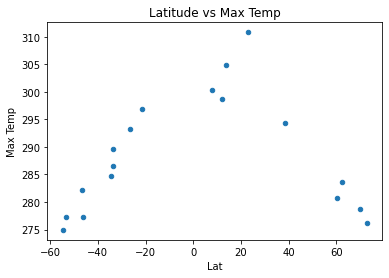

In [21]:
weather_data.plot(x='Lat', y='Max Temp', kind='scatter', title='Latitude vs Max Temp')


<AxesSubplot:title={'center':'Latitude vs Humidity'}, xlabel='Lat', ylabel='Humidity'>

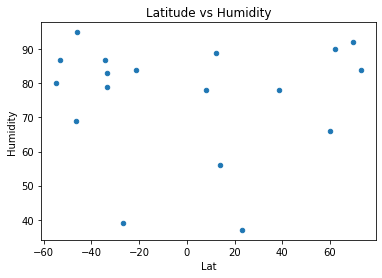

In [22]:
weather_data.plot(x='Lat', y='Humidity', kind='scatter', title='Latitude vs Humidity')

<AxesSubplot:title={'center':'Latitude vs Cloudiness'}, xlabel='Lat', ylabel='Cloudiness'>

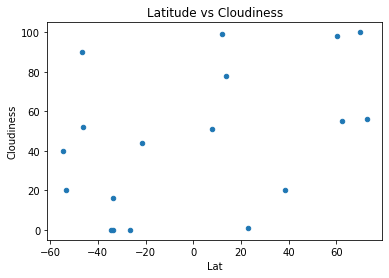

In [24]:
weather_data.plot(x='Lat', y='Cloudiness', kind='scatter', title='Latitude vs Cloudiness')

<AxesSubplot:title={'center':'Latitude vs Wind Speed'}, xlabel='Lat', ylabel='Wind Speed'>

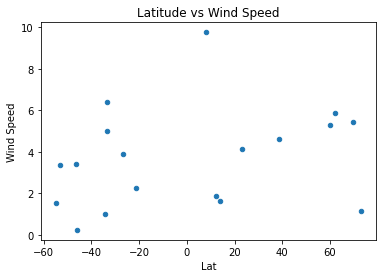

In [25]:
weather_data.plot(x='Lat', y='Wind Speed', kind='scatter', title='Latitude vs Wind Speed')